In [1]:
# Análise de um Sistema representado no Espaçode Estado com equações recursivas na forma expandida

In [47]:
import numpy as np
import sympy as sp
import control
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

In [48]:
# Matrizes do Sistema
A = np.matrix('0 1 0;0 0 1;-1 -5 -6');
B = np.matrix('0;0;1');
C = np.matrix('1 1 1');
D = 0;
sistema = control.ss(A,B,C,D);
#  Condições Iniciais
x0 = np.matrix('1; 1; 1');

In [49]:
# entrada nula - u
t = np.linspace(0, 30, 1000);
u = np.zeros(len(t));


In [50]:
# resposta para entrada nula
Y, t, X = control.matlab.lsim(sistema,u,t,x0);

In [51]:
# separando os elemntos do vetor X
x1a = X[:,0];
x1b = X[:,1];
x1c = X[:,2];

In [52]:
# simulação com discretização dos integradores
# I(z)=T/(z-1)=Xi(z)/Xi_ponto(z)
# xi(k)=T*xi_ponto(k-1)+xi(k-1)

T = 0.1;
tfinal = 30;
Kmax = int(tfinal/T+1);
k = np.linspace(0, Kmax, Kmax+1)
u = np.zeros(len(k));

In [66]:
x1 = np.zeros(len(k));
x2 = np.zeros(len(k));
x3 = np.zeros(len(k));
x1_ponto = np.zeros(len(k));
x2_ponto = np.zeros(len(k));
x3_ponto = np.zeros(len(k));
y = np.zeros(len(k));

# condições iniciais (podem ser diferentes de zero)
x1[0] = x0[0];  #  para k = 0
x2[0] = x0[1];  #  para k = 0
x3[0] = x0[2];  #  para k = 0
x1_ponto[0] = 0;  #  para k = 0
x2_ponto[0] = 0;  #  para k = 0
x3_ponto[0] = 0;  #  para k = 0
y[0] = C[0,0]*x1[0]+C[0,1]*x2[0]+C[0,2]*x3[0]+D*u[0];  #  para k = 0

In [68]:
    for j in range(1,Kmax):
        # Equações dos integradores
        x1[j]=T*x1_ponto[j-1]+x1[j-1];
        x2[j]=T*x2_ponto[j-1]+x2[j-1];    
        x3[j]=T*x3_ponto[j-1]+x3[j-1];
        # Equação diferencial de estados:  Xponto=A*X+B*U
        x1_ponto[j]=A[0,0]*x1[j]+A[0,1]*x2[j]+A[0,2]*x3[j]+B[0]*u[j];  
        x2_ponto[j]=A[1,0]*x1[j]+A[1,1]*x2[j]+A[1,2]*x3[j]+B[1]*u[j]; 
        x3_ponto[j]=A[2,0]*x1[j]+A[2,1]*x2[j]+A[2,2]*x3[j]+B[2]*u[j];  
        # Equação de Saída: Y=C*X+D*U
        y[j] = C[0,0]*x1[j]+C[0,1]*x2[j]+C[0,2]*x3[j]+D*u[j];




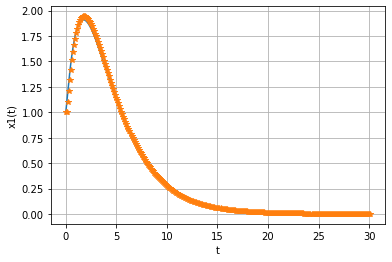

In [70]:
# comportamento do estado x1                       
plt.figure()
plt.plot(t, x1a, k*T, x1,'*')
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()

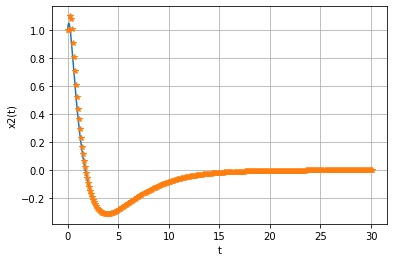

In [71]:
# comportamento do estado x2                       
plt.figure()
plt.plot(t, x1b, k*T, x2,'*')
plt.xlabel("t")
plt.ylabel("x2(t)")
plt.grid(True)
plt.show()

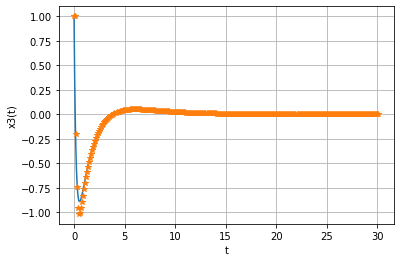

In [73]:
# comportamento do estado x3                       
plt.figure()
plt.plot(t, x1c, k*T, x3,'*')
plt.xlabel("t")
plt.ylabel("x3(t)")
plt.grid(True)
plt.show()

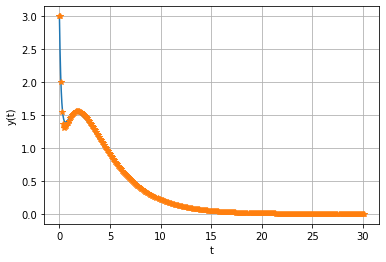

In [74]:
# comportamento da saída y                      
plt.figure()
plt.plot(t, Y, k*T, y,'*')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()